#1. Mount Drive

In [10]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [15]:
!cp -r /gdrive/MyDrive/darknet/trafficsign .

In [17]:
!ls -al ./trafficsign

total 240632
drwx------ 4 root root      4096 Aug 27 07:18 .
drwxr-xr-x 1 root root      4096 Aug 27 07:17 ..
-rw------- 1 root root        35 Aug 27 07:45 classes.names
drwx------ 2 root root      4096 Aug 27 07:18 Meta
drwx------ 2 root root      4096 Aug 27 07:18 Test
-rw------- 1 root root       728 Aug 27 07:45 Test.csv
-rw------- 1 root root      8328 Aug 27 07:45 traffic-train-yolo.cfg
-rw------- 1 root root 246370008 Aug 27 07:45 traffic-train-yolo_final.weights


In [18]:
weight_file = './trafficsign/traffic-train-yolo_final.weights'
cfg_file = './trafficsign/traffic-train-yolo.cfg'
name_file = './trafficsign/classes.names'

min_confidence = 0.5

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [20]:
# Load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [22]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

['Prohibitory', 'Danger', 'Mandatory', 'Ohter']


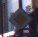

37 38 3


In [33]:
file_name = './trafficsign/Test/00010.png'
img = cv2.imread(file_name)
height, width, channels = img.shape
cv2_imshow(img)
print(height, width, channels)

3 Ohter


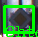

In [34]:
 # Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(class_ids[i], label)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y + 30), font, 0.5, (0, 255, 0), 1)  

cv2_imshow(img)      